<a href="https://colab.research.google.com/github/garci1784/Deep-Learning-Model-Creation/blob/main/AdrianBernardino_Jorge_Garcia_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Homework 2***

https://colab.research.google.com/drive/1kDG3K2PA96XtL3-Froqcq6utzbsKQ1g7?usp=sharing

*   What are the inputs?
The inputs are x_train, y_train, x_test, y_test to determine the images training and labels training.
*   What are the labels?
The labels include accuracy, epochs, losses
These are determined to validate the datasets and results of the 20 epochs of training the network.
*   What are the dimensions of this dataset?
The dimensions for the this dataset contain 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is then split into 50,000 training images and 10,000 testing images. However, for this dataset we are plotting the first 25 images from the training set.



In [12]:
import numpy as py
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import backend
from keras.datasets.cifar import load_batch
from tensorflow.python.util.tf_export import keras_export
from keras import datasets, layers, models

In [ ]:
tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# converting integers to floats
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

Train: x=(50000, 32, 32, 3), y=(50000, 1)
Test: x=(10000, 32, 32, 3), y=(10000, 1)


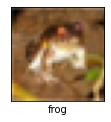

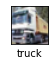

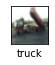

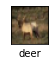

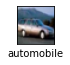

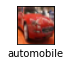

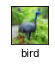

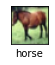

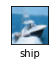

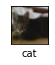

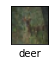

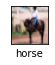

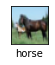

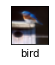

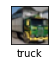

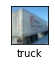

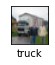

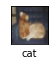

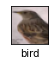

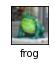

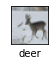

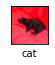

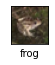

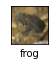

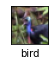

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  # cifar labels are made into arrays
  # index created for this specific reason
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
  plt.show()

In [ ]:
from keras import activations
import keras.layers.advanced_activations as activation_layers
from keras.utils import generic_utils

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation= 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 75,648
Trainable params: 75,648
Non-traina

ReLU function was chosen based upon being able to modify the default parameters into different numbers or even non-zero thresholds.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Sigmoid function was chosen since it has accurate display of similar activation function like Softmax. The sigmoid function always will return a value between 0 and 1. 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activations.sigmoid))
model.add(layers.Dense(10))

Softmax function was chosen since it can be used for the last layer of the model. This is because softmax results in probability distribution.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activations.softmax))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 120s 76ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.2858 - val_accuracy: 0.1212
Epoch 2/20
1563/1563 [==============================] - 114s 73ms/step - loss: 2.1364 - accuracy: 0.1862 - val_loss: 2.0839 - val_accuracy: 0.2019
Epoch 3/20
1563/1563 [==============================] - 113s 72ms/step - loss: 2.0139 - accuracy: 0.2239 - val_loss: 1.9315 - val_accuracy: 0.2460
Epoch 4/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.8663 - accuracy: 0.2664 - val_loss: 1.7938 - val_accuracy: 0.2829
Epoch 5/20
1563/1563 [==============================] - 111s 71ms/step - loss: 1.7677 - accuracy: 0.2961 - val_loss: 1.7217 - val_accuracy: 0.3257
Epoch 6/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6821 - accuracy: 0.3406 - val_loss: 1.6318 - val_accuracy: 0.3687
Epoch 7/20
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5979 - accuracy: 0.3843 - val_loss: 1

In [ ]:
def plotLoss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('evaluating model loss and accuracy')
    plt.ylabel('loss & accuracy')
    plt.xlabel('epoch')
    plt.legend(['xtrain', 'val_loss', 'ytrain', 'val_acc' ], loc='upper right')
    plt.show()

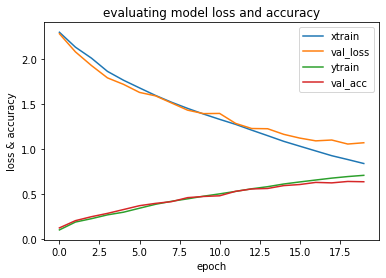

In [ ]:
plotLoss(history)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.0705024003982544, 0.6355999708175659]


In [ ]:
from keras.optimizers import gradient_descent_v2

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

sgd = gradient_descent_v2.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 120s 77ms/step - loss: 1.5185 - accuracy: 0.4510 - val_loss: 1.1986 - val_accuracy: 0.5852
Epoch 2/15
1563/1563 [==============================] - 125s 80ms/step - loss: 1.0895 - accuracy: 0.6140 - val_loss: 1.0541 - val_accuracy: 0.6325
Epoch 3/15
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8841 - accuracy: 0.6893 - val_loss: 1.0560 - val_accuracy: 0.6378
Epoch 4/15
1563/1563 [==============================] - 126s 80ms/step - loss: 0.7149 - accuracy: 0.7509 - val_loss: 1.0272 - val_accuracy: 0.6655
Epoch 5/15
1563/1563 [==============================] - 123s 79ms/step - loss: 0.5639 - accuracy: 0.8000 - val_loss: 1.0320 - val_accuracy: 0.6738
Epoch 6/15
1563/1563 [==============================] - 125s 80ms/step - loss: 0.4252 - accuracy: 0.8489 - val_loss: 1.2770 - val_accuracy: 0.6529
Epoch 7/15
1563/1563 [==============================] - 124s 79ms/step - loss: 0.3169 - accuracy: 0.8878 - val_loss: 1.4315 - val

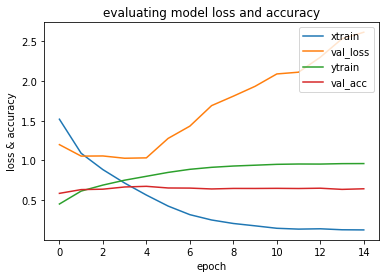

In [ ]:
plotLoss(history)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.6134510040283203, 0.642799973487854]


In [ ]:
from keras.metrics import losses_utils
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape=(512,)))
# Dropout layer added here
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalHinge(reduction=losses_utils.ReductionV2.AUTO), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
1563/1563 [==============================] - 332s 212ms/step - loss: 0.1100 - accuracy: 0.1009 - val_loss: 0.1100 - val_accuracy: 0.0998
Epoch 2/4
1563/1563 [==============================] - 336s 215ms/step - loss: 0.1100 - accuracy: 0.1009 - val_loss: 0.1100 - val_accuracy: 0.1000
Epoch 3/4
1563/1563 [==============================] - 337s 216ms/step - loss: 0.1100 - accuracy: 0.1006 - val_loss: 0.1100 - val_accuracy: 0.1000
Epoch 4/4
1563/1563 [==============================] - 330s 211ms/step - loss: 0.1100 - accuracy: 0.0982 - val_loss: 0.1100 - val_accuracy: 0.1000


In [ ]:
def plotLoss(history):  
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    plt.show()

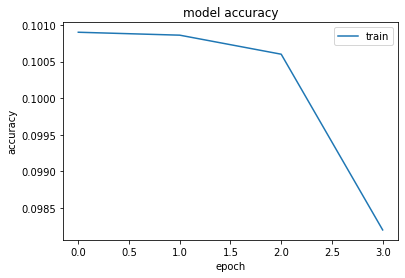

In [ ]:
plotLoss(history)

These changes were able to improve the models accuracy since adding different types of activation function layers. Being able to see the difference in accuracy and loss helps to determine for 1 additional hidden layer, 1 different optimizer, and 1 different loss function. These strategies coherently were able to help with runtime speed as well which was one of the challenges that we can face while implementing different sizes. The last training and testing had layers the sizes of 128, 256, and 512. Because of the large amount of neurons, waittime can be roughly 5 to 6 minutes per epoch. 


In [5]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

In [7]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 13s 6ms/step - loss: 1.7138 - accuracy: 0.3848
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3499 - accuracy: 0.5260
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1691 - accuracy: 0.5916
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0481 - accuracy: 0.6364
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9484 - accuracy: 0.6720
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8762 - accuracy: 0.6998
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8124 - accuracy: 0.7192
Epoch 8/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7600 - accuracy: 0.7396
Epoch 9/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7091 - accuracy: 0.7556
Epoch 10/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6673 - accuracy: 0.771

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.9766 - accuracy: 0.7227
Test accuracy: 0.723
